## Project 1: NASA's hazardous objects


In [2]:
# Dependencies
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as st 
import csv 


In [3]:
# Data files
objects_path = "./neo_v2.csv"


# Read the data 
objects_data = pd.read_csv(objects_path)
objects_data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
len(objects_data)

90836

In [5]:
n = objects_data['id'].nunique()
n

27423

In [17]:
unique_df = objects_data.groupby(by = 'id')['miss_distance'].min().reset_index()
unique_df.head()
x = unique_df['id'].nunique()


,id,miss_distance
0,2000433,2.672952e+07
1,2000719,4.258288e+07
2,2001036,5.372124e+07
3,2001566,8.053782e+06
4,2001580,3.557394e+07


In [30]:
unique_objects_df = pd.merge(unique_df, objects_data, how = 'inner', on = ['id', 'miss_distance'])
unique_objects_df


,id,miss_distance,name,est_diameter_min,est_diameter_max,relative_velocity,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2000433,2.672952e+07,433 Eros (A898 PA),23.043847,51.527608,21402.705247,Earth,False,10.310,False
1,2000719,4.258288e+07,719 Albert (A911 TB),2.044349,4.571303,27551.597194,Earth,False,15.570,False
2,2001036,5.372124e+07,1036 Ganymed (A924 UB),37.892650,84.730541,51496.923293,Earth,False,9.230,False
3,2001566,8.053782e+06,1566 Icarus (1949 MA),1.427431,3.191832,108801.296374,Earth,False,16.350,True
4,2001580,3.557394e+07,1580 Betulia (1950 KA),3.065879,6.855513,105157.775851,Earth,False,14.690,False
...,...,...,...,...,...,...,...,...,...,...
27418,54275849,2.211065e+07,(2022 GL5),0.199965,0.447136,97087.784087,Earth,False,20.618,False
27419,54275852,1.781882e+07,(2022 GO5),0.045264,0.101214,27826.213807,Earth,False,23.844,False
27420,54275853,9.777491e+06,(2022 GP5),0.056022,0.125268,42604.694355,Earth,False,23.381,False
27421,54275865,1.895127e+04,(2022 GQ5),0.001227,0.002744,51054.089177,Earth,False,31.678,False


In [31]:
unique_objects_df.drop(columns = ['orbiting_body', 'sentry_object'], inplace = True)
unique_objects_df.to_csv("./unique_objects.csv", index_label="index")

### Statistics 

In [34]:
miss_s = unique_objects_df['miss_distance'].agg(['mean', 'median', 'var', 'std', 'sem'])
miss_s

mean      1.770540e+07
median    1.145114e+07
var       2.972905e+14
std       1.724212e+07
sem       1.041197e+05
Name: miss_distance, dtype: float64

In [35]:
velocity_s = unique_objects_df['relative_velocity'].agg(['mean', 'median', 'var', 'std', 'sem'])
velocity_s

mean      4.285946e+04
median    3.792331e+04
var       5.709828e+08
std       2.389525e+04
sem       1.442959e+02
Name: relative_velocity, dtype: float64

In [36]:
magnitude_s = unique_objects_df['absolute_magnitude'].agg(['mean', 'median', 'var', 'std', 'sem'])
magnitude_s

mean      23.361668
median    23.600000
var        8.236446
std        2.869921
sem        0.017331
Name: absolute_magnitude, dtype: float64

In [37]:
dia_min_s =  unique_objects_df['est_diameter_min'].agg(['mean', 'median', 'var', 'std', 'sem'])
dia_min_s

mean      0.139082
median    0.050647
var       0.140191
std       0.374420
sem       0.002261
Name: est_diameter_min, dtype: float64

In [38]:
dia_max_s =  unique_objects_df['est_diameter_max'].agg(['mean', 'median', 'var', 'std', 'sem'])
dia_max_s

mean      0.310996
median    0.113250
var       0.700953
std       0.837229
sem       0.005056
Name: est_diameter_max, dtype: float64

In [39]:
summary_df = pd.DataFrame({
    'miss_distance' : miss_s,
    'relative_velocity' : velocity_s,
    'absolute_magnitude' : magnitude_s,
    'est_diameter_min' : dia_min_s,
    'est_diameter_max' : dia_max_s,
})
summary_df

,miss_distance,relative_velocity,absolute_magnitude,est_diameter_min,est_diameter_max
mean,1.770540e+07,4.285946e+04,23.361668,0.139082,0.310996
median,1.145114e+07,3.792331e+04,23.600000,0.050647,0.113250
var,2.972905e+14,5.709828e+08,8.236446,0.140191,0.700953
std,1.724212e+07,2.389525e+04,2.869921,0.374420,0.837229
sem,1.041197e+05,1.442959e+02,0.017331,0.002261,0.005056


### Graphs
- Pie: hazardous 
- Bar (10 observations each): min distance, max velocity, max magnitude, max dia_min, max dia_max
- Scatter: vel v h, mag v h, dia v h
- Box (complete df?): depending on scatter results


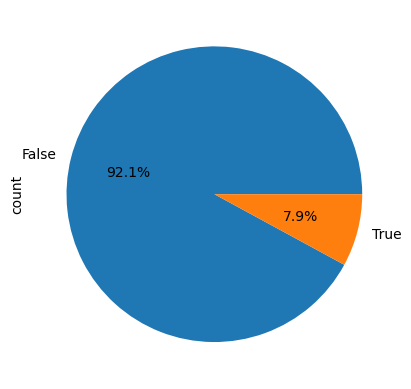

In [40]:
hazardous = unique_objects_df['hazardous'].value_counts()
hazardous.plot.pie(autopct = '%1.1f%%')
plt.show()